In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print(cv2.__version__)

4.1.2


In [3]:
images_dir = "./../data/images"
image_files = os.listdir(images_dir)

In [4]:
image_path = "{}/{}".format(images_dir, "cap09.jpg")

In [5]:
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [6]:
def plt_images(img1, img2, title1="", title2=""):
    fig = plt.figure(figsize=[15,15])
    ax1 = fig.add_subplot(121)
    ax1.imshow(img1, cmap="gray")
    ax1.set(xticks=[], yticks=[], title=title1)

    ax2 = fig.add_subplot(122)
    ax2.imshow(img2, cmap="gray")
    ax2.set(xticks=[], yticks=[], title=title2)

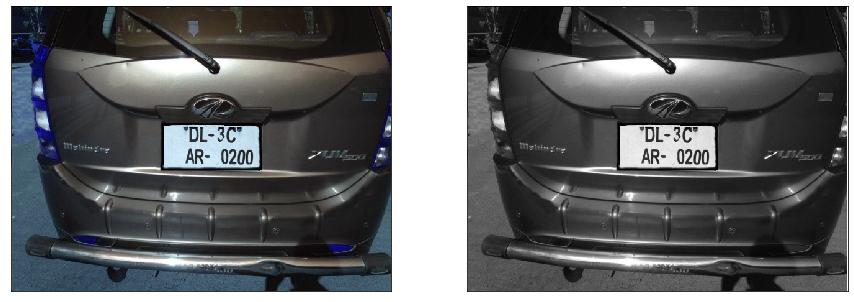

In [7]:
plt_images(image, gray)

In [8]:
blur = cv2.bilateralFilter(gray, 11,30, 30)

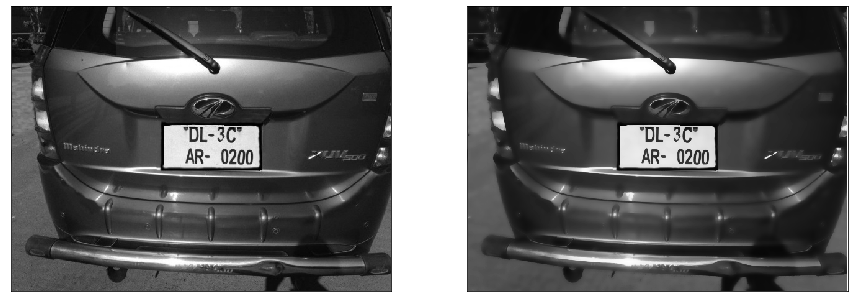

In [9]:
plt_images(gray, blur)

In [10]:
edges = cv2.Canny(blur, 30, 200)

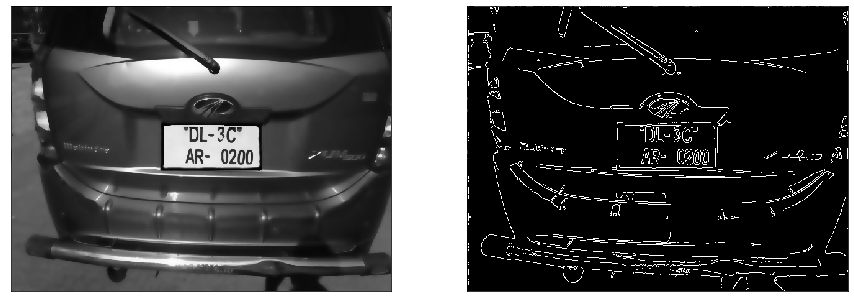

In [11]:
plt_images(blur, edges)

In [12]:
cnts, new = cv2.findContours(edges.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [13]:
image_copy = image.copy()

In [14]:
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

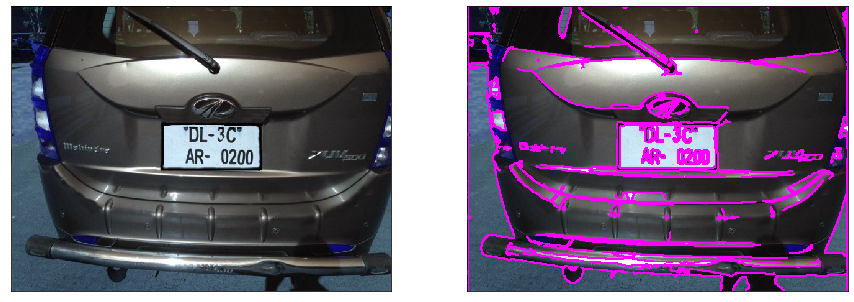

In [15]:
plt_images(image, image_copy)

In [16]:
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)[:10]

In [17]:
image_copy = image.copy()
_ = cv2.drawContours(image_copy, cnts, -1, (255,0,255),2)

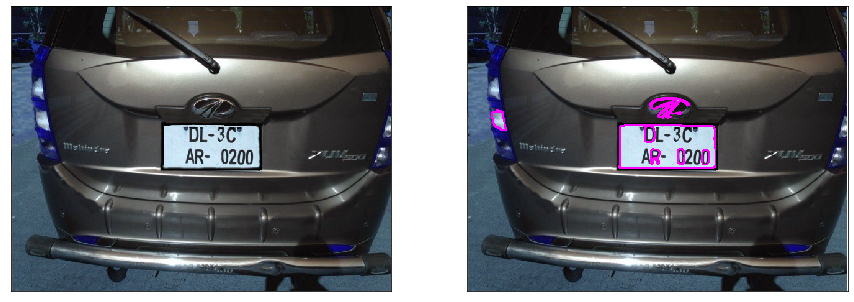

In [18]:
plt_images(image, image_copy)

In [19]:
plate = None
for c in cnts:
    perimeter = cv2.arcLength(c, True)
    edges_count = cv2.approxPolyDP(c, 0.02 * perimeter, True)
    if len(edges_count) == 4:
        x,y,w,h = cv2.boundingRect(c)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.png", plate)

True

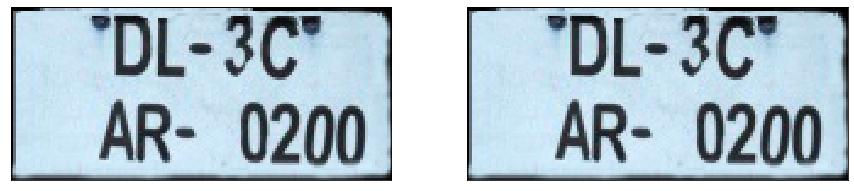

In [20]:
plt_images(plate, plate)

In [21]:
import pytesseract
text = pytesseract.image_to_string(plate, lang="eng")

In [22]:
print(text)

“DL-3C"
AR- 0200.
